# Testing for Carplate Detection Using YOLOv8

Data Source:
[License Plate Recognition Image Dataset](https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4)

In [1]:
# Import essential libraries
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

## Install Ultralytics Library

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 9.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Connecting GPU for the YOLO Detection Task

At `Runtime` -> `Change runtime type` -> Select `T4 GPU`

In [3]:
!nvidia-smi

Thu May  2 14:31:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
%cd /content

/content


## Download the carplate dataset

In [5]:
import gdown

url = "https://drive.google.com/file/d/1mm96uwXsYR5xAXeDXKiygCcMxBPIT1Fj/view?usp=sharing"
file_id = url.split("/")[-2]
prefix = "https://drive.google.com/uc?/export=download&id="

gdown.download(prefix + file_id)
print("Data downloaded!")

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1mm96uwXsYR5xAXeDXKiygCcMxBPIT1Fj
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1mm96uwXsYR5xAXeDXKiygCcMxBPIT1Fj&confirm=t&uuid=d2bdcab5-0c04-4cb0-befe-bc224d0c7158
To: /content/carplate-detection.zip
100%|██████████| 998M/998M [00:09<00:00, 101MB/s] 

Data downloaded!


In [ ]:
!unzip carplate-detection.zip
!rm -rf carplate-detection.zip

In [7]:
# This is the YAML file we 're loading into this notebook with our data (Only one class)
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['License_Plate']

roboflow:
  workspace: roboflow-universe-projects
  project: license-plate-recognition-rxg4e
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4

### YOLOv8 Nano Model Training

Machine Learning Parameters: [Train - Ultralytics](https://docs.ultralytics.com/modes/train/)
- model: yolov8n; yolov8l
- epochs: 50 - 100
- imgsz: 640

**Note that the learning usually takes around 1-2 hours for training, for large data set, it might takes 6 hours or above for the training.

In [8]:
# For the training, nano model and 10 epochs are applied since it a  big data set
!yolo task=detect mode=train model=yolov8n.pt data="../content/data.yaml" epochs=10 batch=16 imgsz=640 name=car_yolov8n exist_ok=True amp=False

100% 6.23M/6.23M [00:00<00:00, 123MB/s]
Ultralytics YOLOv8.2.6 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=car_yolov8n, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [9]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
# %load_ext tensorboard
# %tensorboard --logdir runs

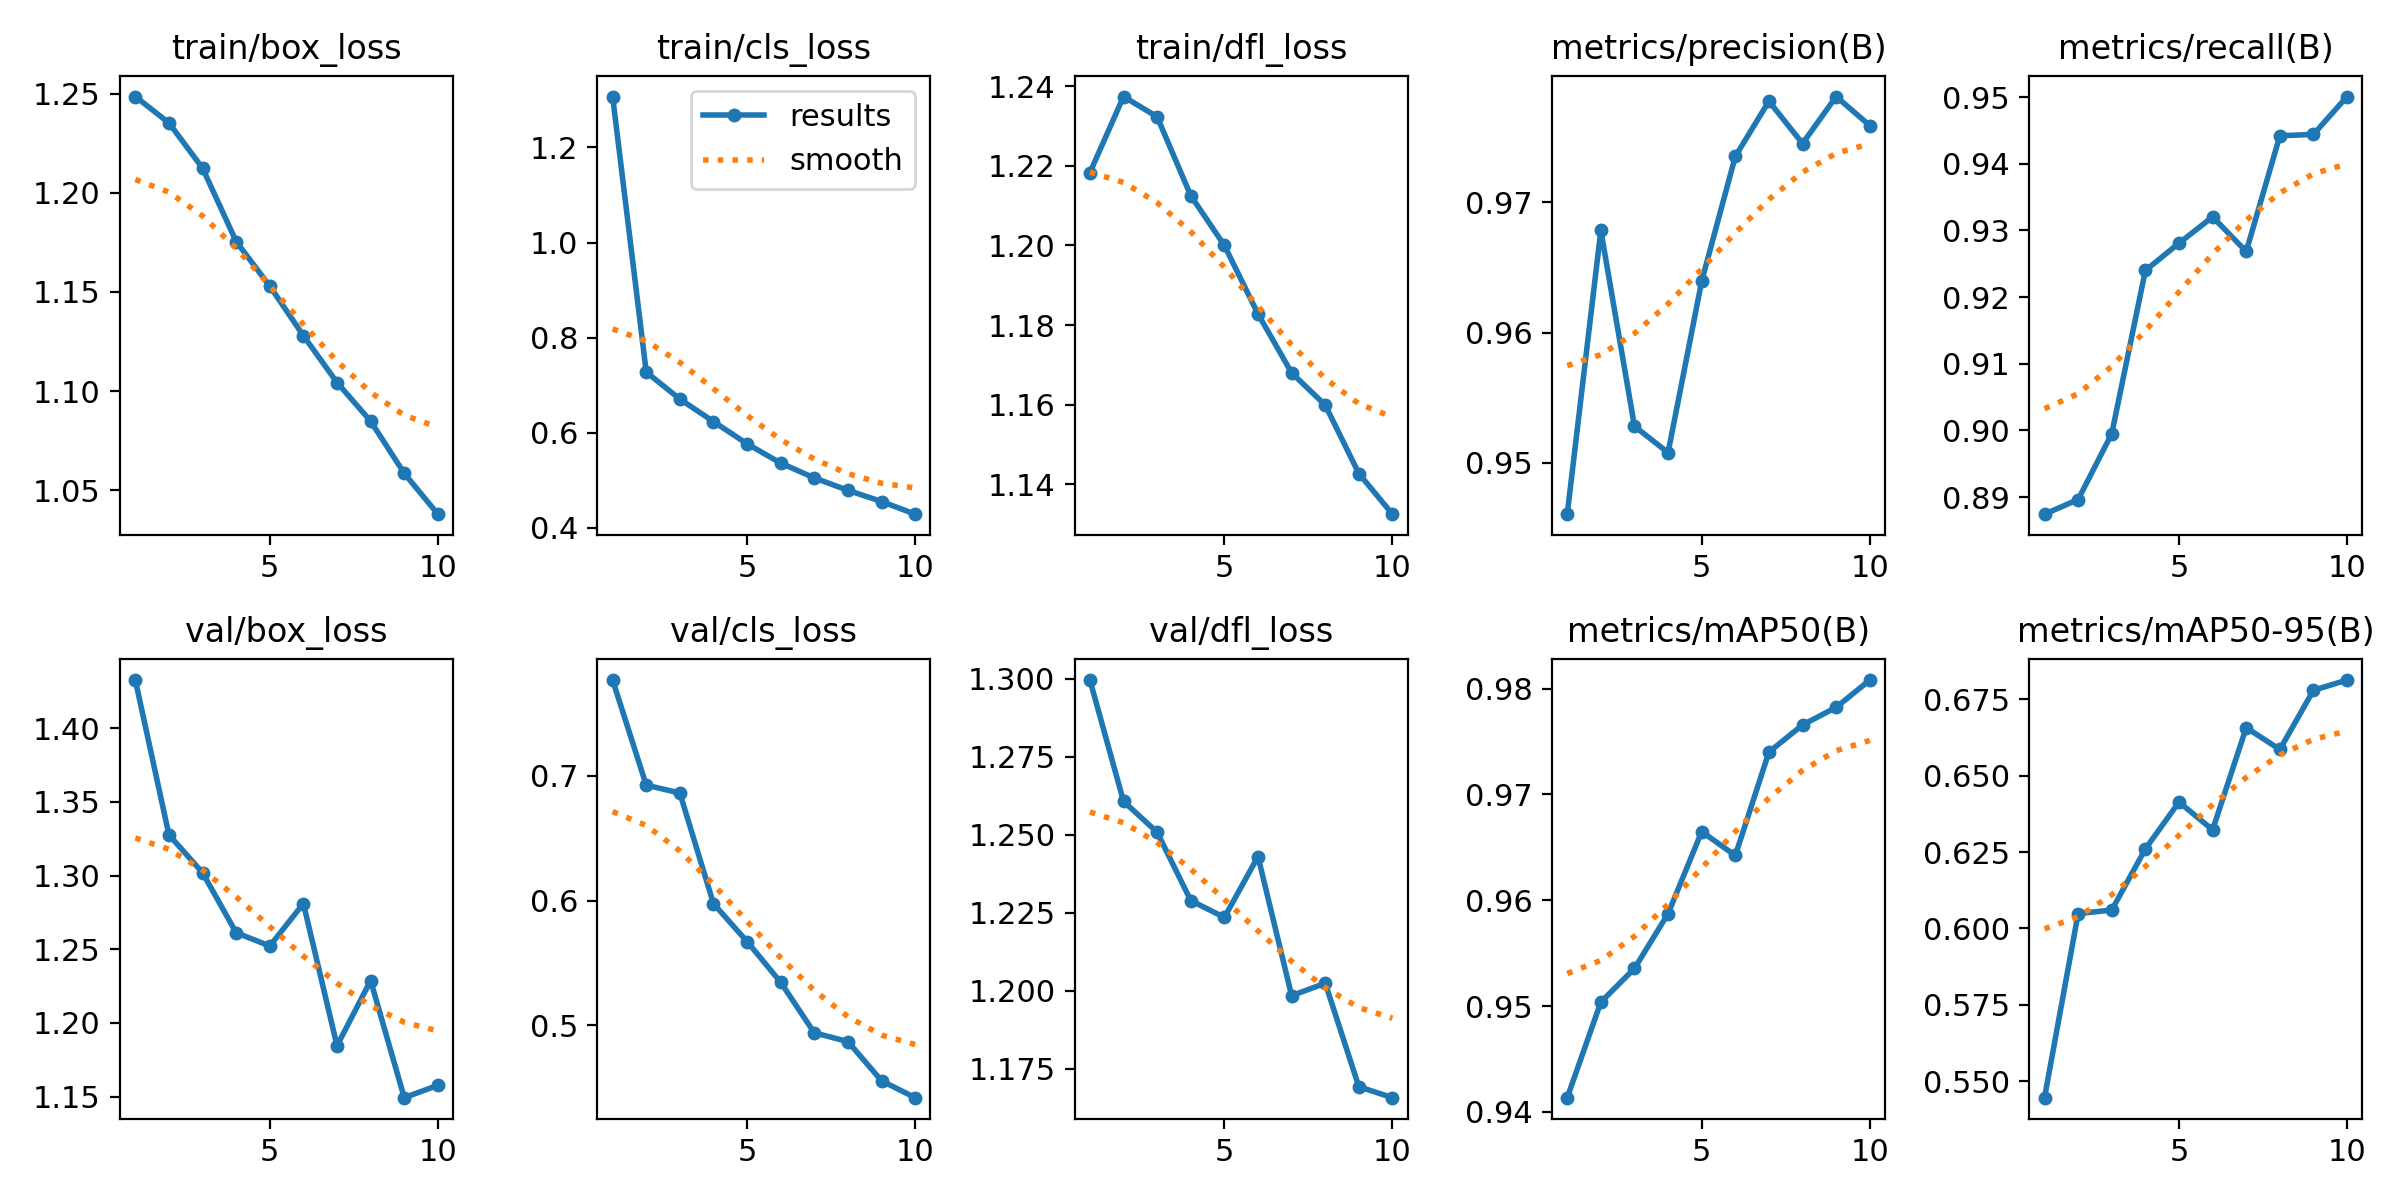

In [11]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from IPython.display import Image, clear_output # to display images
Image(filename='/content/runs/detect/car_yolov8n/results.png', width=1000)  # view results.png

In [ ]:
!yolo predict \
model='/content/runs/detect/car_yolov8n/weights/best.pt' \
source='/content/valid/images' \
name='yolov8n_predict' \
exist_ok=True \
save=True

In [14]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

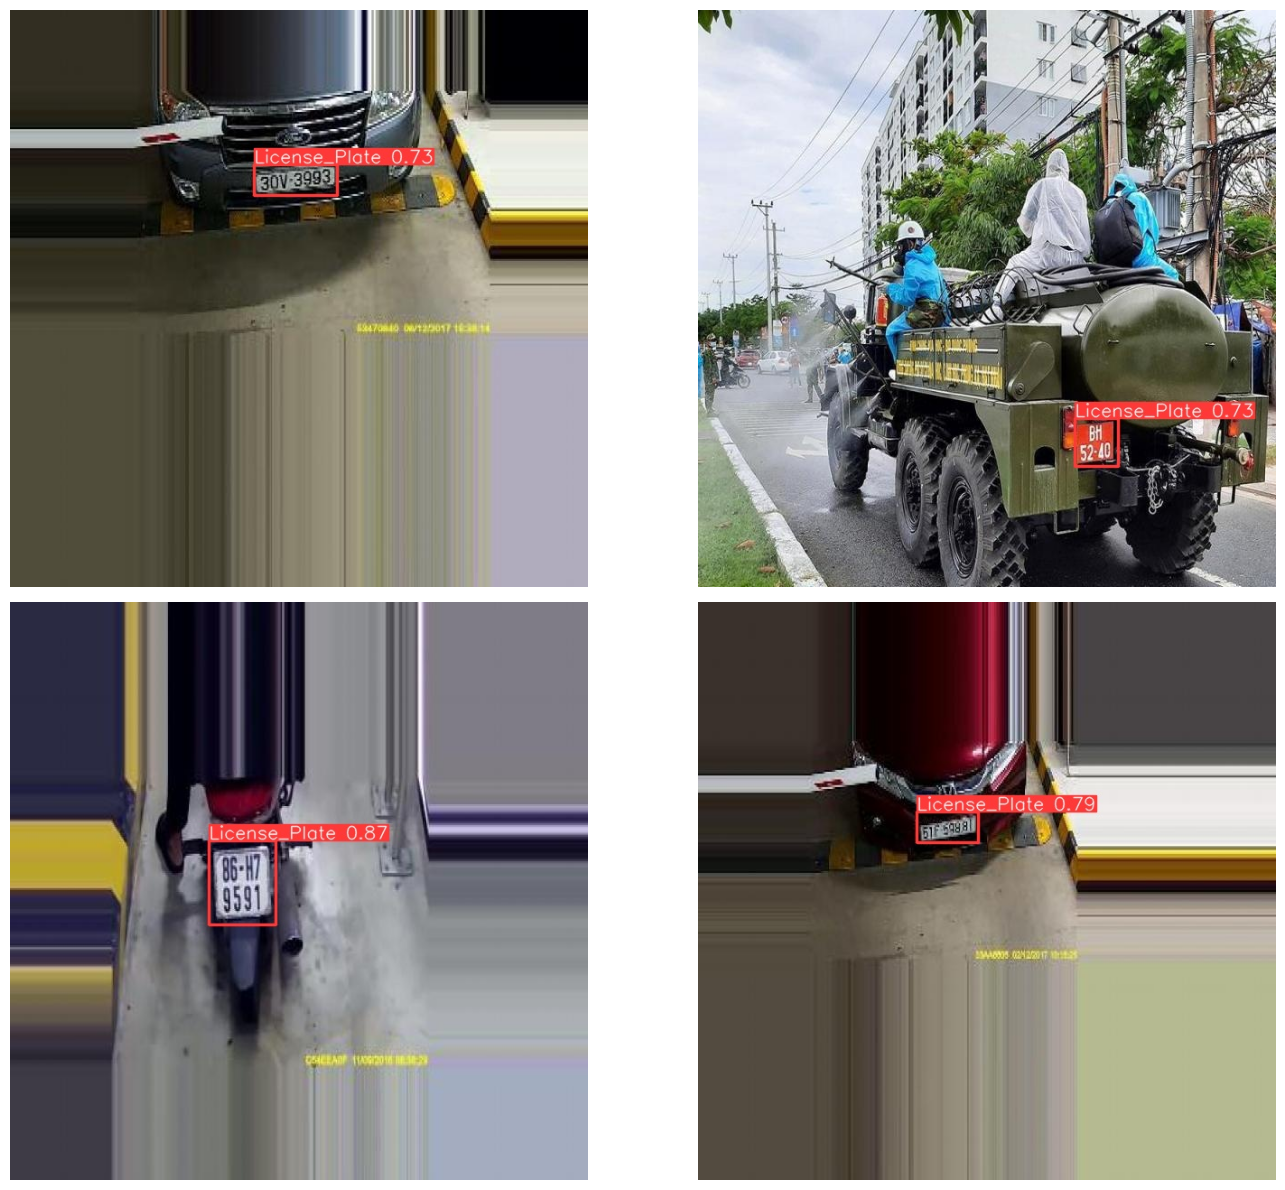

In [15]:
visualize('/content/runs/detect/yolov8n_predict')

### Export Trained Weights for Future Inference
